In [ ]:
import pandas as pd
df=pd.read_csv('irisData.csv')
df.drop('Id',axis=1,inplace=True)

#**DROPPING TARGET TO APPLY UNSUPERVISED LEARNING**

In [ ]:
df.drop('Species',axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#**SPLIT DATASET**

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test= train_test_split(df, train_size=0.7)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
print(X_train)


[[-9.95048039e-01  7.96605270e-01 -1.20302968e+00 -1.03001479e+00]
 [ 5.39687072e-01  5.44666856e-01  5.37353255e-01  5.16848900e-01]
 [ 7.75800166e-01 -2.11148385e-01  8.18060179e-01  1.03247013e+00]
 [ 4.21630525e-01 -4.63086798e-01  3.12787716e-01  1.30132977e-01]
 [ 3.03573978e-01 -2.11148385e-01  6.49636025e-01  7.74659514e-01]
 [-1.68652210e-01 -1.21890204e+00 -1.36343363e-01 -2.56582945e-01]
 [-5.22821851e-01  7.96605270e-01 -1.14688829e+00 -1.28782541e+00]
 [-5.05956630e-02 -7.15025212e-01  7.61918794e-01  1.54809136e+00]
 [ 1.01191326e+00  5.44666856e-01  1.09876710e+00  1.67699667e+00]
 [ 5.39687072e-01 -7.15025212e-01  7.61918794e-01  3.87943592e-01]
 [-1.34921768e+00  2.92728442e-01 -1.37145383e+00 -1.28782541e+00]
 [ 6.74608840e-02  2.92728442e-01  5.93494640e-01  7.74659514e-01]
 [-8.76991492e-01  1.04854368e+00 -1.31531244e+00 -1.28782541e+00]
 [ 2.19247873e+00 -2.11148385e-01  1.32333264e+00  1.41918605e+00]
 [ 1.24802635e+00  2.92728442e-01  1.09876710e+00  1.41918605e

#**MODEL IMPLEMENTATION (CLASSIFICATION )**

**MODEL TRAINING**

[488.2066666666666, 97.72607227022783, 51.7174470899471, 37.452406905744766, 30.785347222222228, 25.983439696053868, 21.59880370704287, 19.27983942132859, 17.559518063635707]


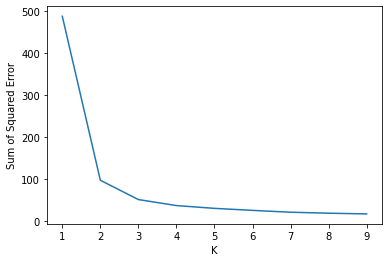

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
k_rng=range(1,50)  # 1,2 ,3,4,5,6,7,8,9
for k in k_rng:
  km = KMeans(n_clusters=k,init='k-means++')
  km.fit(x_train)
  sse.append(km.inertia_)
print(sse)

plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)

In [ ]:
from sklearn.cluster import KMeans
## Clustering with KMeans
kmeans = KMeans(n_clusters=5)
model=kmeans.fit(x_train)


**MODEL TESTING**

In [ ]:

pdc = kmeans.predict(x_test)
print("================Kmeans Labels ====================")
print(labels)
print("================Kmeans Predict ====================")
print(pdc)


================Kmeans Labels ====================
[1 0 2 0 0 0 1 0 2 0 1 0 1 2 2 0 1 2 0 0 2 1 2 2 0 2 0 0 2 1 2 1 2 2 0 0 1
 1 0 1 0 1 0 2 1 2 2 0 1 0 0 2 0 1 1 2 2 1 0 0 0 2 0 1 0 0 1 1 1 0 1 1 1 1
 1 1 0 0 0 1 1 0 1 1 2 2 0 0 2 2 0 0 1 0 0 1 2 1 0 0 1 2 0 1 2]
================Kmeans Predict ====================
[2 0 0 1 2 2 1 0 2 2 1 0 0 0 0 2 1 0 1 0 2 0 0 2 0 0 0 0 0 1 1 1 1 0 1 1 1
 1 1 2 2 0 0 0 2]
